# 7. Hands-on with data

In the following problem, you will use two simple datasets to walk through the steps of a standard machine learning workflow: inspecting your data, choosing a model, implementing it, and verifying its accuracy. 
We have provided two datasets in the form of numpy arrays: *dataset_1.npy* and *dataset_1.npy*. 
You can load each using NumPy's *np.load* method(https://numpy.org/doc/). 
You can plot figures using Matplotlib's *plt.plot* method(https://matplotlib.org/stable/users/explain/quick_start.html).

Each dataset is a two-column array with the first column consisting of $n$ scalar inputs $X \in \R^{n \times 1}$ and the second column consisting of $n$ scalar labels $Y \in \R^{n \times 1}$. 
We denote each entry of $X$ and $Y$ with subscripts:
$$
X = 
    \begin{bmatrix}
        x_1 \\
        x_2 \\
        \vdots \\
        x_n \\
    \end{bmatrix}
    ~~~~~~~~
    Y = 
    \begin{bmatrix}
        y_1 \\
        y_2 \\
        \vdots \\
        y_n \\
    \end{bmatrix}
$$
and assume that $y_i$ is a (potentially stochastic) function of $x_i$.

In [1]:
#initial
import numpy as np
import matplotlib.pyplot as plt

data_1 = np.load('dataset_1.npy')
data_2 = np.load('dataset_2.npy')

X_1 = data_1[:, 0]
Y_1 = data_1[:, 1]

X_2 = data_2[:, 0]
Y_2 = data_2[:, 1]

(a) It is often useful to visually inspect your data and calculate simple statistics; this can detect dataset corruptions or inform your method.

Notes: Your solution may make use of the NumPy library only for arithmetic operations, matrix-vector or matrix-matrix multiplications, matrix inversion, and elementwise exponentiation. It may not make use of library calls for calculating means, standard deviations, or the correlation coefficient itself directly.

 For both datasets:

- (i) Plot the data as a scatter plot.

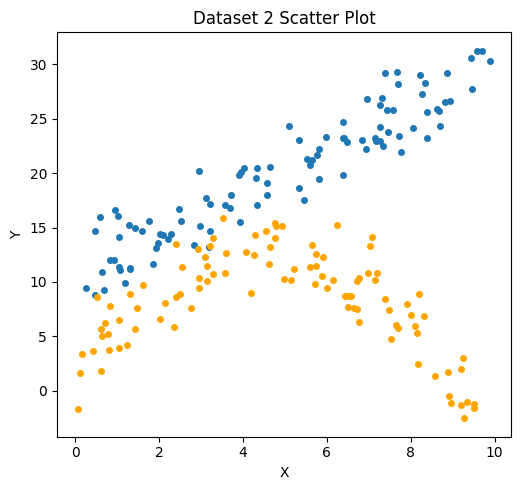

In [4]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(X_1, Y_1, 'o', markersize = 4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 1 Scatter Plot')


plt.subplot(1, 2, 1)
plt.plot(X_2, Y_2, 'o', markersize = 4, color = 'orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 2 Scatter Plot')

plt.tight_layout()
plt.show()

- (ii) Calculate the correlation coefficient between X and Y:
$$ \rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$
in which $\text{Cov}(X, Y)$ is the covariance between $X$ and $Y$ and $\sigma_X$ is the standard deviation of $X$.


In [14]:
def calc_rho(X, Y) :
    n = len(X)
    mu_X = np.sum(X) / n
    mu_Y = np.sum(Y) / n

    cov = np.sum((X - mu_X) * (Y - mu_Y))
    sigma_X = np.sqrt(np.sum((X - mu_X) ** 2))
    sigma_Y = np.sqrt(np.sum((Y - mu_Y) ** 2))

    rho = cov / (sigma_X * sigma_Y)

    return rho

rho_1 = calc_rho(X_1, Y_1)
rho_2 = calc_rho(X_2, Y_2)

print(f"dataset_1 : {rho_1:.4f}")
print(f"dataset_2 : {rho_2:.4f}")


dataset_1 : 0.9391
dataset_2 : -0.1793


(b) We would like to design a function that can predict $y_i$ given $x_i$ and then apply it to new inputs. This is a recurring theme in machine learning, and you will soon learn about a general-purpose framework for thinking about such problems. As a preview, we will now explore one of the simplest instantiations of this idea using the class of linear functions:
$$\hat{Y} = X w.$$
The parameters of our function are denoted by $w \in \R$. It is common to denote predicted variants of quantities with a hat, so $\hat{Y}$ is a predicted label whereas $Y$ is a ground truth label.
We would like to find a $w^{*}$ that minimizes the **squared error** $\mathcal{J}_\text{SE}$ between predictions and labels:
$$ w^* = \argmin_{w} \mathcal{J}_\text{SE}(w) = \argmin_w \| Xw - Y \|_2^2. $$
Derive $\nabla_w \mathcal{J}_\text{SE}(w)$ and set it equal to 0 to solve for $w^*$. (Note that this procedure for finding an optimum relies on the convexity of $\mathcal{J}_\text{SE}$. You do not need to show convexity here, but it is a useful exercise to convince yourself this is valid.)

    
    

In [17]:
def get_w(X, Y) : 
    return np.dot(X.T, Y).item() / np.dot(X.T, X).item()

w_1 = get_w(X_1, Y_1)
w_2 = get_w(X_2, Y_2)

print(f"w_1 : {w_1:.4f}")
print(f"w_2 : {w_2:.4f}")

w_1 : 3.5415
w_2 : 1.1933


(c) Your solution $w^*$ should be a function of $X$ and $Y$. Implement it and report its **mean squared error**(MSE) for **dataset 1**. The mean squared error is the objective $\mathcal{J}_\text{SE}$ from part (b) divided by the number of datapoints:
$$\mathcal{J}_\text{MSE}(w) = \frac{1}{n} \| Xw - Y \|_2^2.$$
Also visually inspect the model's quality by plotting a line plot of predicted $\hat{y}$ for uniformly-spaced $x \in [0, 10]$. Keep the scatter plot from part (a) in the background so that you can compare the raw data to your linear function. Does the function provide a good fit of the data? Why or why not?
    
    

data_1 w* : 3.54, MSE:32.03


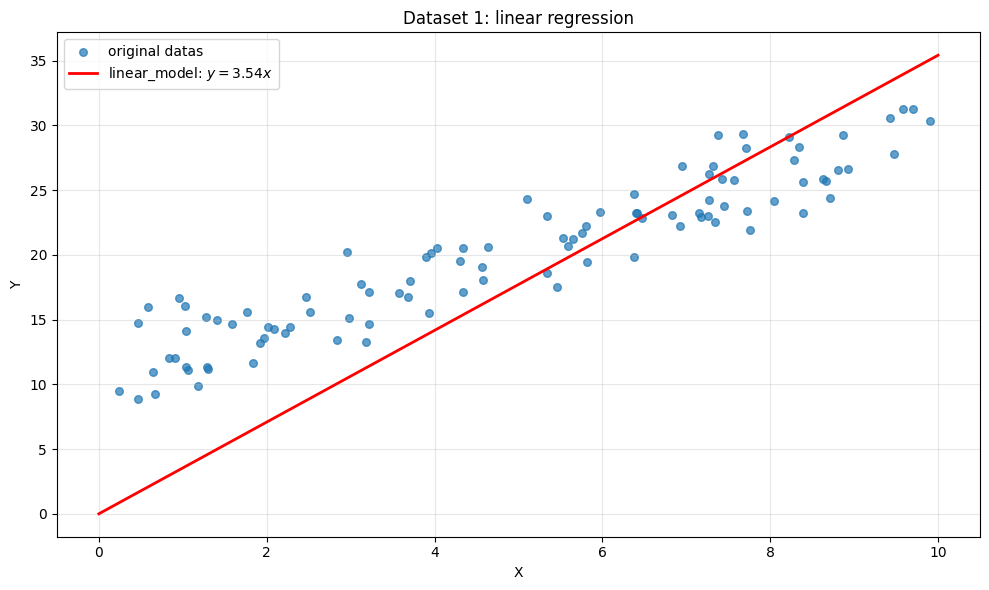

In [26]:
def get_MSE(X, Y, w) :
    n = len(X)
    return np.sum((X * w - Y) ** 2) / n

mse1 = get_MSE(X_1, Y_1, w_1)

print(f"data_1 w* : {w_1:.2f}, MSE:{mse1:.2f}")

x_test = np.linspace(0, 10, 100)
y_pred = w_1 * x_test  

plt.figure(figsize=(10, 6))
plt.scatter(X_1, Y_1, s=30, alpha=0.7, label='original datas')
plt.plot(x_test, y_pred, 'r-', linewidth=2, label=f'linear_model: $y = {w_1:.2f}x$')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 1: linear regression')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('problem_7c.png', dpi=300)
plt.show()



(d) We are now going to experiment with constructing new *features* for our model. That is, instead of considering models that are linear in the inputs, we will now consider models that are linear in some (potentially nonlinear) transformation of the data:
$$
\hat{Y} = \Phi w = \begin{bmatrix}
            \phi(x_1)^\top \\
            \phi(x_2)^\top \\
            \vdots \\
            \phi(x_n)^\top
        \end{bmatrix} w,
$$
where $\phi(x_i), w \in \R^m$. Repeat part (c), providing both the mean squared error of your predictor and a plot of its predictions, for the following features on **dataset 1**:
$$
\phi(x_i) = \begin{bmatrix}
            x_i \\
            1
        \end{bmatrix}.
$$
How do the plotted function and mean squared error compare? (A single sentence will suffice.)

*Hint:* the general form of your solution for $w^*$ is still valid, but you will now need to use features $\Phi$ where you once used raw inputs $X$.

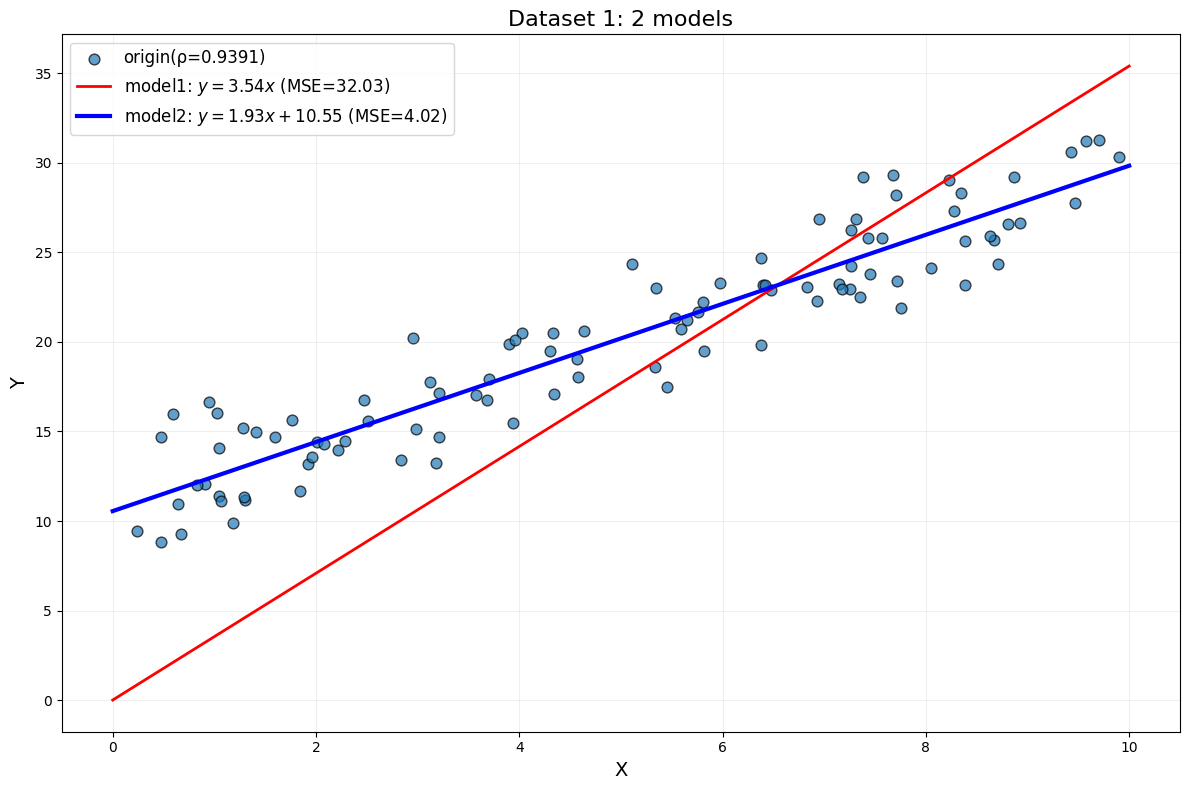

In [27]:
def get_w2(X, Y) : 
    Phi = np.column_stack((X, np.ones(len(X))))
    return np.linalg.inv(Phi.T @ Phi) @ Phi.T @ Y

def get_MSE2(X, Y, w) : 
    Phi = np.column_stack((X, np.ones(len(X))))
    Y_hat = Phi @ w
    return np.sum((Y_hat - Y) ** 2) / len(Y)

def get_yhat2(X, w) : 
    Phi = np.column_stack((X, np.ones(len(X))))
    Y_hat = Phi @ w
    return Y_hat

w_d = get_w2(X_1, Y_1)

mse_bias_d = get_MSE2(X_1, Y_1, w_d)

y_hat_d = get_yhat2(x_test, w_d)

plt.figure(figsize=(12, 8))
plt.scatter(X_1, Y_1, s=60, alpha=0.7, edgecolor='k', label=f'origin(ρ={rho_1:.4f})')
plt.plot(x_test, w_1 * x_test, 'r-', linewidth=2, label=f'model1: $y={w_1:.2f}x$ (MSE={mse1:.2f})')
plt.plot(x_test, y_hat_d, 'b-', linewidth=3, label=f'model2: $y = {w_d[0]:.2f}x + {w_d[1]:.2f}$ (MSE={mse_bias_d:.2f})')
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Dataset 1: 2 models', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.savefig('problem_7d.png', dpi=300)
plt.show()


(e) Now consider the quadratic features:
    $$
        \phi(x_i) = \begin{bmatrix}
            x_i^2 \\
            x_i \\
            1
        \end{bmatrix}.
    $$
Repeat part (c) with these features on **dataset 1**, once again providing short commentary on any changes.


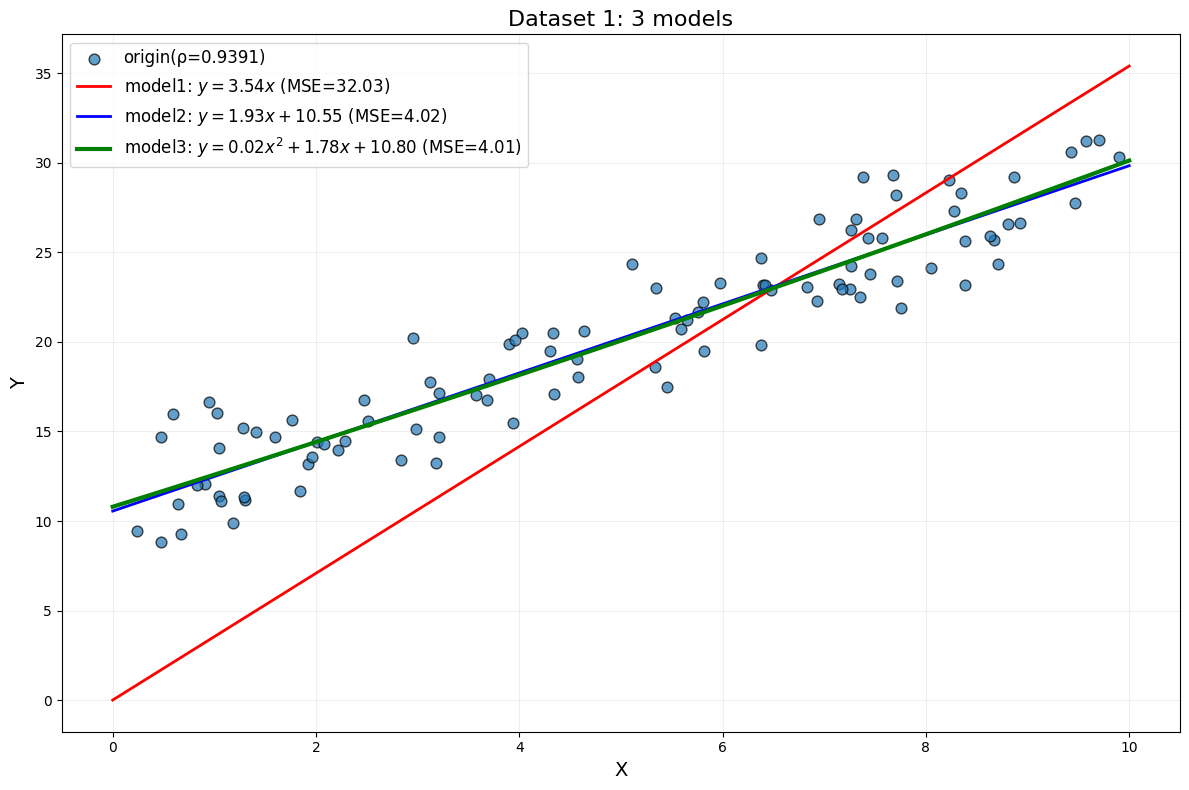

In [28]:
#TODO

def get_w3(X, Y) : 
    Phi = np.column_stack((X ** 2, X, np.ones(len(X))))
    return np.linalg.inv(Phi.T @ Phi) @ Phi.T @ Y

def get_yhat3(X, w) : 
    Phi = np.column_stack((X ** 2, X, np.ones(len(X))))
    Y_hat = Phi @ w
    return Y_hat

def get_MSE3(X, Y, w) : 
    Y_hat = get_yhat3(X, w)
    return np.sum((Y_hat - Y) ** 2) / len(Y)

w_e = get_w3(X_1, Y_1)

y_hat_e = get_yhat3(x_test, w_e)

mse_bias_e = get_MSE3(X_1, Y_1, w_e)

plt.figure(figsize=(12, 8))
plt.scatter(X_1, Y_1, s=60, alpha=0.7, edgecolor='k', label=f'origin(ρ={rho_1:.4f})')
plt.plot(x_test, w_1 * x_test, 'r-', linewidth=2, label=f'model1: $y={w_1:.2f}x$ (MSE={mse1:.2f})')
plt.plot(x_test, y_hat_d, 'b-', linewidth=2, label=f'model2: $y = {w_d[0]:.2f}x + {w_d[1]:.2f}$ (MSE={mse_bias_d:.2f})')
plt.plot(x_test, y_hat_e, 'g-', linewidth=3, label=f'model3: $y = {w_e[0]:.2f}x^2 + {w_e[1]:.2f}x+{w_e[2]:.2f}$ (MSE={mse_bias_e:.2f})')
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Dataset 1: 3 models', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.savefig('problem_7e.png', dpi=300)
plt.show()


(f) Repeat parts (c) - (e) with **dataset 2**.

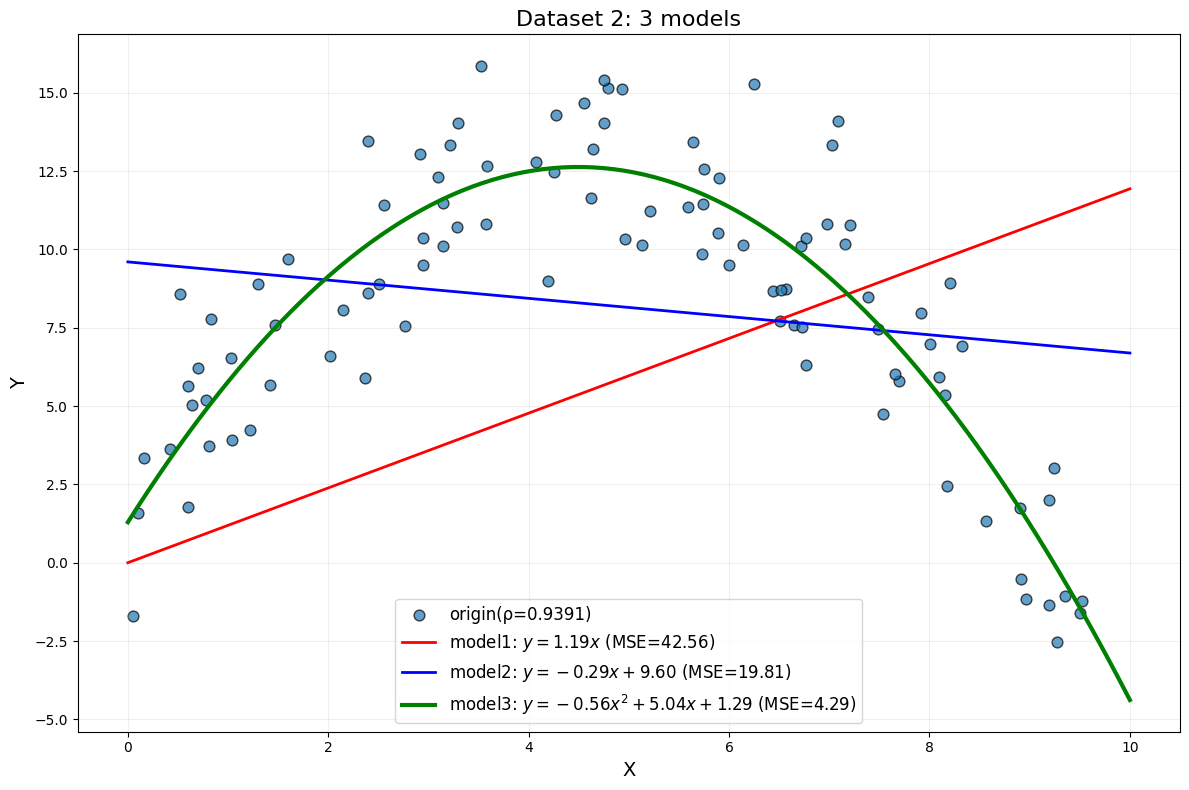

In [30]:
#TODO

w_f1 = get_w(X_2, Y_2)
y_hat_f1 = w_f1 * x_test
mse_bias_f1 = get_MSE(X_2, Y_2, w_f1)

w_f2 = get_w2(X_2, Y_2)
y_hat_f2 = get_yhat2(x_test, w_f2)
mse_bias_f2 = get_MSE2(X_2, Y_2, w_f2)

w_f3 = get_w3(X_2, Y_2)
y_hat_f3 = get_yhat3(x_test, w_f3)
mse_bias_f3 = get_MSE3(X_2, Y_2, w_f3)

plt.figure(figsize=(12, 8))
plt.scatter(X_2, Y_2, s=60, alpha=0.7, edgecolor='k', label=f'origin(ρ={rho_1:.4f})')
plt.plot(x_test, y_hat_f1, 'r-', linewidth=2, label=f'model1: $y={w_f1:.2f}x$ (MSE={mse_bias_f1:.2f})')
plt.plot(x_test, y_hat_f2, 'b-', linewidth=2, label=f'model2: $y = {w_f2[0]:.2f}x + {w_f2[1]:.2f}$ (MSE={mse_bias_f2:.2f})')
plt.plot(x_test, y_hat_f3, 'g-', linewidth=3, label=f'model3: $y = {w_f3[0]:.2f}x^2 + {w_f3[1]:.2f}x+{w_f3[2]:.2f}$ (MSE={mse_bias_f3:.2f})')
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Dataset 2: 3 models', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.savefig('problem_7f.png', dpi=300)
plt.show()

(g) Finally, we would like to understand which features $\Phi$ provide us with the best model. To that end, you will implement a method known as $k$-fold cross validation. The following are instructions for this method; deliverables for part (g) are at the end.

- (i) Split **dataset 2** randomly into $k=4$ equal sized subsets. Group the dataset into 4 distinct training / validation splits by denoting each subset as the validation set and the remaining subsets as the training set for that split.

- (ii) On each of the 4 training / validation splits, fit linear models using the following 5 polynomial feature sets:
$$
\phi_1(x_i) = \begin{bmatrix}
                x_i \\
                1
            \end{bmatrix}
            ~~~~
            \phi_2(x_i) = \begin{bmatrix}
                x_i^2 \\
                x_i \\
                1
            \end{bmatrix}
            ~~~~
            \phi_3(x_i) = \begin{bmatrix}
                x_i^3 \\
                x_i^2 \\
                x_i \\
                1
            \end{bmatrix}
            ~~~~
            \phi_4(x_i) = \begin{bmatrix}
                x_i^4 \\
                x_i^3 \\
                x_i^2 \\
                x_i \\
                1
            \end{bmatrix}
            ~~~~
            \phi_5(x_i) = \begin{bmatrix}
                x_i^5 \\
                x_i^4 \\
                x_i^3 \\
                x_i^2 \\
                x_i \\
                1
            \end{bmatrix} $$ 
This step will produce 20 distinct $w^*$ vectors: one for each dataset split and featurization $\phi_j$. 
   
- (iii) For each feature set $\phi_j$, average the training and validation mean squared errors over all training splits.

It is worth thinking about what this extra effort has bought us: by splitting the dataset into subsets, we were able to use all available datapoints for model fitting while still having held-out datapoints for evaluation for any particular model.

**Deliverables for part (g):** Plot the training mean squared error and the validation mean squared error on the same plot as a function of the largest exponent in the feature set. 



In [34]:
#TODO

np.random.seed(19260817)
k = 4
n = len(X_2)
indices = np.random.permutation(n)
fold_size = n // k
folds = [indices[i*fold_size:(i+1)*fold_size] for i in range(k)]

def create_Phi(X, degree) : 
    _col = []
    for d in range(degree, 0, -1) : 
        _col.append(X ** d)
    _col.append(np.ones_like(X))
    return np.column_stack(_col)

def train_and_evaluate(X_train, Y_train, X_val, Y_val, degree) : 
    Phi_train = create_Phi(X_train, degree)
    Phi_val = create_Phi(X_val, degree)
    w_star = np.linalg.inv(Phi_train.T @ Phi_train) @ Phi_train.T @ Y_train

    train_hat = Phi_train @ w_star
    train_val = Phi_val @ w_star

    train_mse = np.mean((train_hat - Y_train) ** 2)
    val_mse = np.mean((train_val - Y_val) ** 2)

    return train_mse, val_mse

degrees = range(1, 6)
results = {d: {'train_mses': [], 'val_mses': []} for d in degrees}

for fold_idx in range(k):
    val_indices = folds[fold_idx]
    X_val = X_2[val_indices]
    Y_val = Y_2[val_indices]
    
    train_indices = np.concatenate([folds[i] for i in range(k) if i != fold_idx])
    X_train = X_2[train_indices]
    Y_train = Y_2[train_indices]
    
    for degree in degrees:
        train_mse, val_mse = train_and_evaluate(X_train, Y_train, X_val, Y_val, degree)
        results[degree]['train_mses'].append(train_mse)
        results[degree]['val_mses'].append(val_mse)

avg_train_mses = []
avg_val_mses = []

for degree in degrees:
    avg_train = np.mean(results[degree]['train_mses'])
    avg_val = np.mean(results[degree]['val_mses'])
    avg_train_mses.append(avg_train)
    avg_val_mses.append(avg_val)
    
    print(f"Degree: {degree}:")
    print(f"Average training set MSE = {avg_train:.4f}")
    print(f"Average evaluating set MSE = {avg_val:.4f}")

Degree: 1:
Average training set MSE = 19.6999
Average evaluating set MSE = 20.5744
Degree: 2:
Average training set MSE = 4.2479
Average evaluating set MSE = 4.5649
Degree: 3:
Average training set MSE = 4.2024
Average evaluating set MSE = 4.7379
Degree: 4:
Average training set MSE = 4.1753
Average evaluating set MSE = 4.9702
Degree: 5:
Average training set MSE = 4.1589
Average evaluating set MSE = 5.1436
